# Car_Price_Prediction

A Indian automobile company Mahindra Auto aspires to enter the US market by setting up their manufacturing unit there
and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends.
Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be
very different from the Indian market. The company wants to know:

- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

In [10]:
# Start by importing all important libraries.

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Read the csv file and assign it to a variable .

df = pd.read_csv('Car_Price_Prediction.csv')

In [12]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
# Data Cleaning and Preparation
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
# Performing Statistical Anayslis on data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [18]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [19]:
#Splitting company name from "CarName" column

spl = df['CarName'].str.split(" ",expand=True)

In [20]:
spl

,0,1,2,3,4
0,alfa-romero,giulia,None,None,None
1,alfa-romero,stelvio,None,None,None
2,alfa-romero,Quadrifoglio,None,None,None
3,audi,100,ls,None,None
4,audi,100ls,None,None,None
...,...,...,...,...,...
200,volvo,145e,(sw),None,None
201,volvo,144ea,None,None,None
202,volvo,244dl,None,None,None
203,volvo,246,None,None,None


In [21]:
# Checking duplicates

df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [22]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


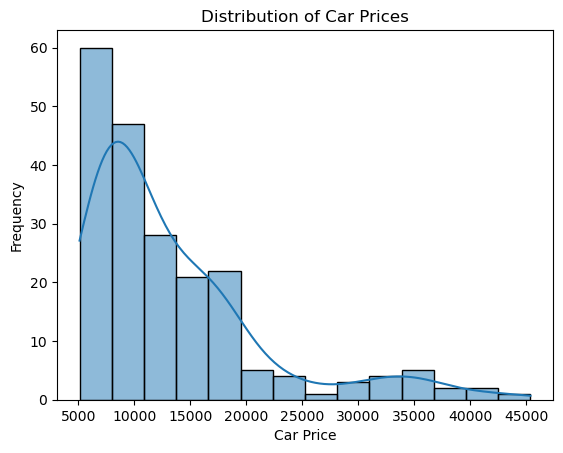

In [23]:
# Distribution plot with car price column

sns.histplot(data=df, x="price", kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:xlabel='price'>

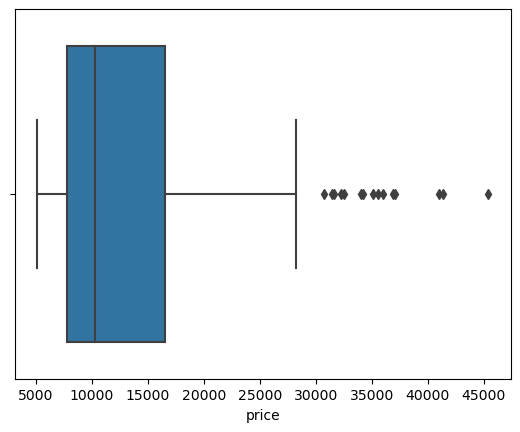

In [24]:
# Boxplot with car price column

sns.boxplot(df.price)

In [25]:
# checking outliers

Q1,Q3= df.price.quantile([0.25,0.75])

In [26]:
Q1,Q3

(7788.0, 16503.0)

In [27]:
IQR = Q3-Q1

In [28]:
IQR

8715.0

In [29]:
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [30]:
LL,UL

(-5284.5, 29575.5)

In [31]:
df.price = np.where(df.price>UL,UL,df.price)

<AxesSubplot:xlabel='price'>

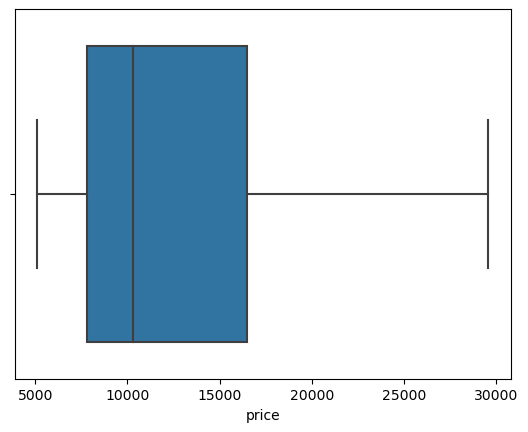

In [32]:
sns.boxplot(df.price)

In [33]:
# Checking the Skewness of the Data

price_column = df["price"]
skewness = price_column.skew()
print("Skewness of car price column:", skewness)

Skewness of car price column: 1.222030944709571


In [34]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:xlabel='carbody', ylabel='fuelsystem'>

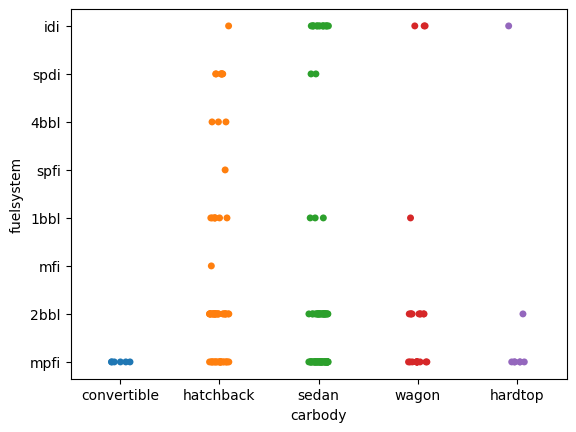

In [35]:
# Visualising Categorical Data

sns.stripplot(x=df.carbody,y=df.fuelsystem,data=df)

<AxesSubplot:xlabel='price', ylabel='fueltype'>

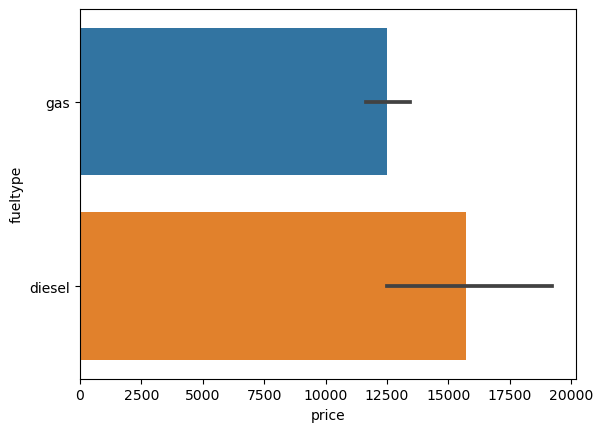

In [36]:
sns.barplot(x=df.price,y=df.fueltype,data=df)

Text(0, 0.5, 'Count')

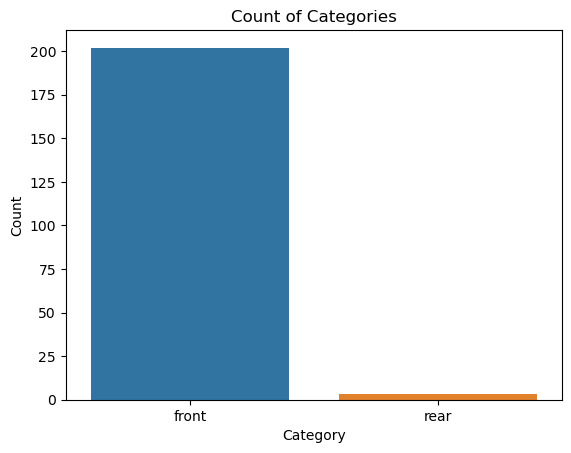

In [37]:
sns.countplot(data=df, x="enginelocation")
plt.title("Count of Categories")
plt.xlabel("Category")
plt.ylabel("Count")

(-1.1160277637893739,
 1.100763227629991,
 -1.103620132490246,
 1.1171876828277405)

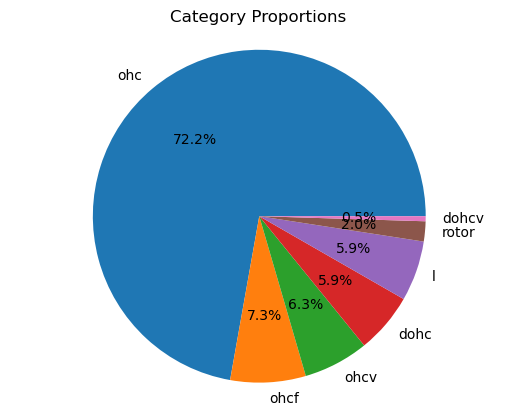

In [38]:
category_counts = df["enginetype"].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title("Category Proportions")
plt.axis('equal')

Text(0, 0.5, 'Count')

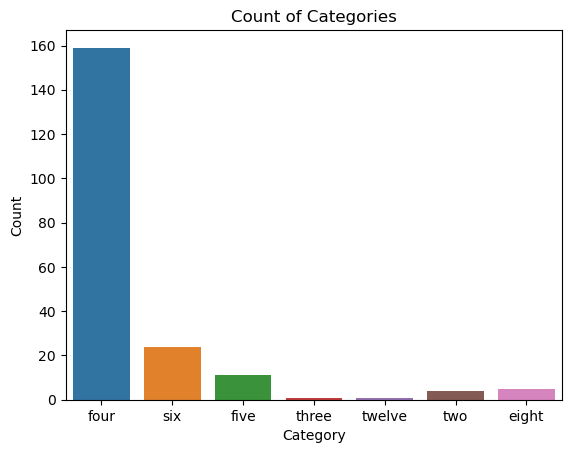

In [39]:
sns.countplot(data=df, x="cylindernumber")
plt.title("Count of Categories")
plt.xlabel("Category")
plt.ylabel("Count")

(-1.1166059977024017,
 1.1007907629229052,
 -1.1176773566424698,
 1.1214781831660379)

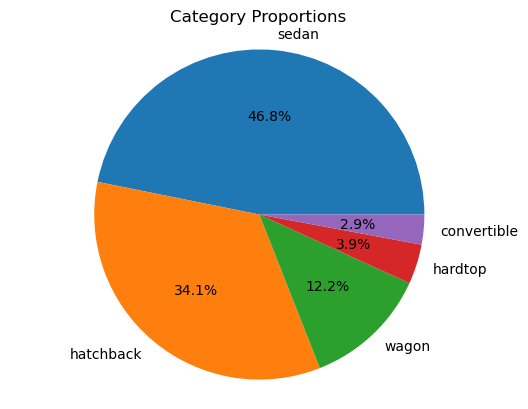

In [40]:
category_counts = df["carbody"].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title("Category Proportions")
plt.axis('equal')

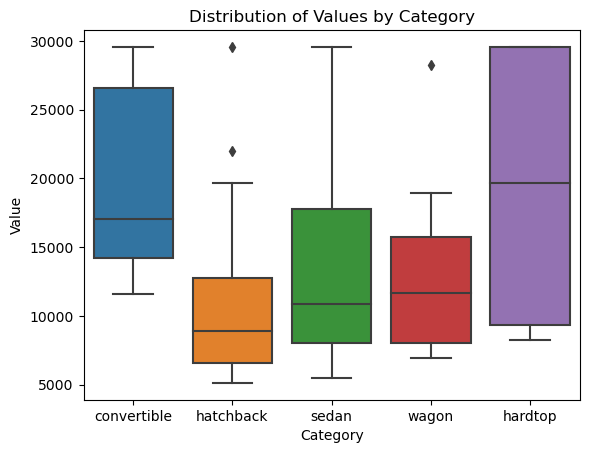

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pandas DataFrame called df with columns "category" and "value"
sns.boxplot(data=df, x="carbody", y="price")
plt.title("Distribution of Values by Category")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()


In [42]:
# Visualising numerical Data

df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.089603
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.092705
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.601109
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.712455
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.785024
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.142033
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.864597
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.842251
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.572685
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.085907


([<matplotlib.patches.Wedge at 0x2c53c7c2d60>,
 [Text(1.0483135687051786, 0.3332246414486976, ''),
  Text(0.6635091532404821, 0.8773571698949629, ''),
  Text(-0.022134102106451867, 1.0997772872377123, ''),
  Text(-0.6551712054715287, 0.8836009798098824, ''),
  Text(-1.032269374412365, 0.3800262341606235, ''),
  Text(-1.0536915923424546, -0.31580694771778345, ''),
  Text(-0.653077472892088, -0.8851496000117066, ''),
  Text(0.009114537743997364, -1.0999622380798868, ''),
  Text(0.6572612039381457, -0.8820474532573513, ''),
  Text(1.0475217323867767, -0.3357055557738151, '')],
 [Text(0.5718074011119155, 0.18175889533565323, '9.8%'),
  Text(0.36191408358571747, 0.4785584563063433, '9.8%'),
  Text(-0.012073146603519198, 0.5998785203114794, '11.5%'),
  Text(-0.35736611207537927, 0.48196417080539034, '8.2%'),
  Text(-0.5630560224067445, 0.2072870368148855, '10.2%'),
  Text(-0.5747408685504297, -0.17225833511879093, '10.2%'),
  Text(-0.35622407612295703, -0.4828088727336581, '10.2%'),
  Text(0

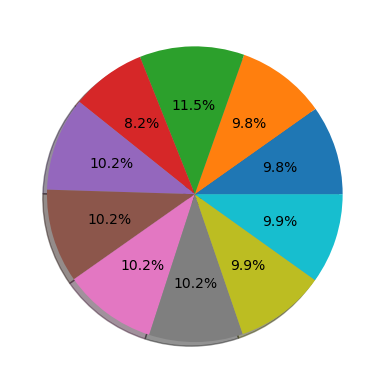

In [43]:
plt.pie(df.enginesize.head(10),shadow=True,autopct='%1.1f%%')

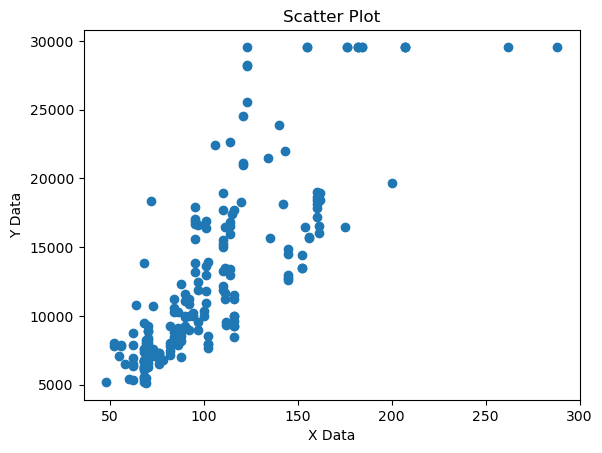

In [44]:
plt.scatter(df.horsepower,df.price)
plt.title("Scatter Plot")
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

In [45]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Text(0, 0.5, 'Y Data')

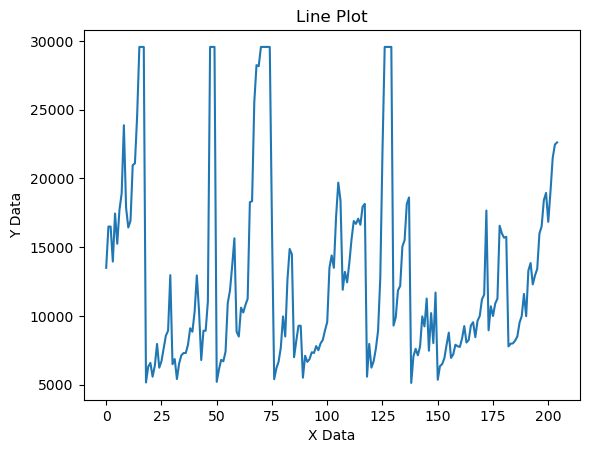

In [46]:
plt.plot(df.price)
plt.title("Line Plot")
plt.xlabel("X Data")
plt.ylabel("Y Data")

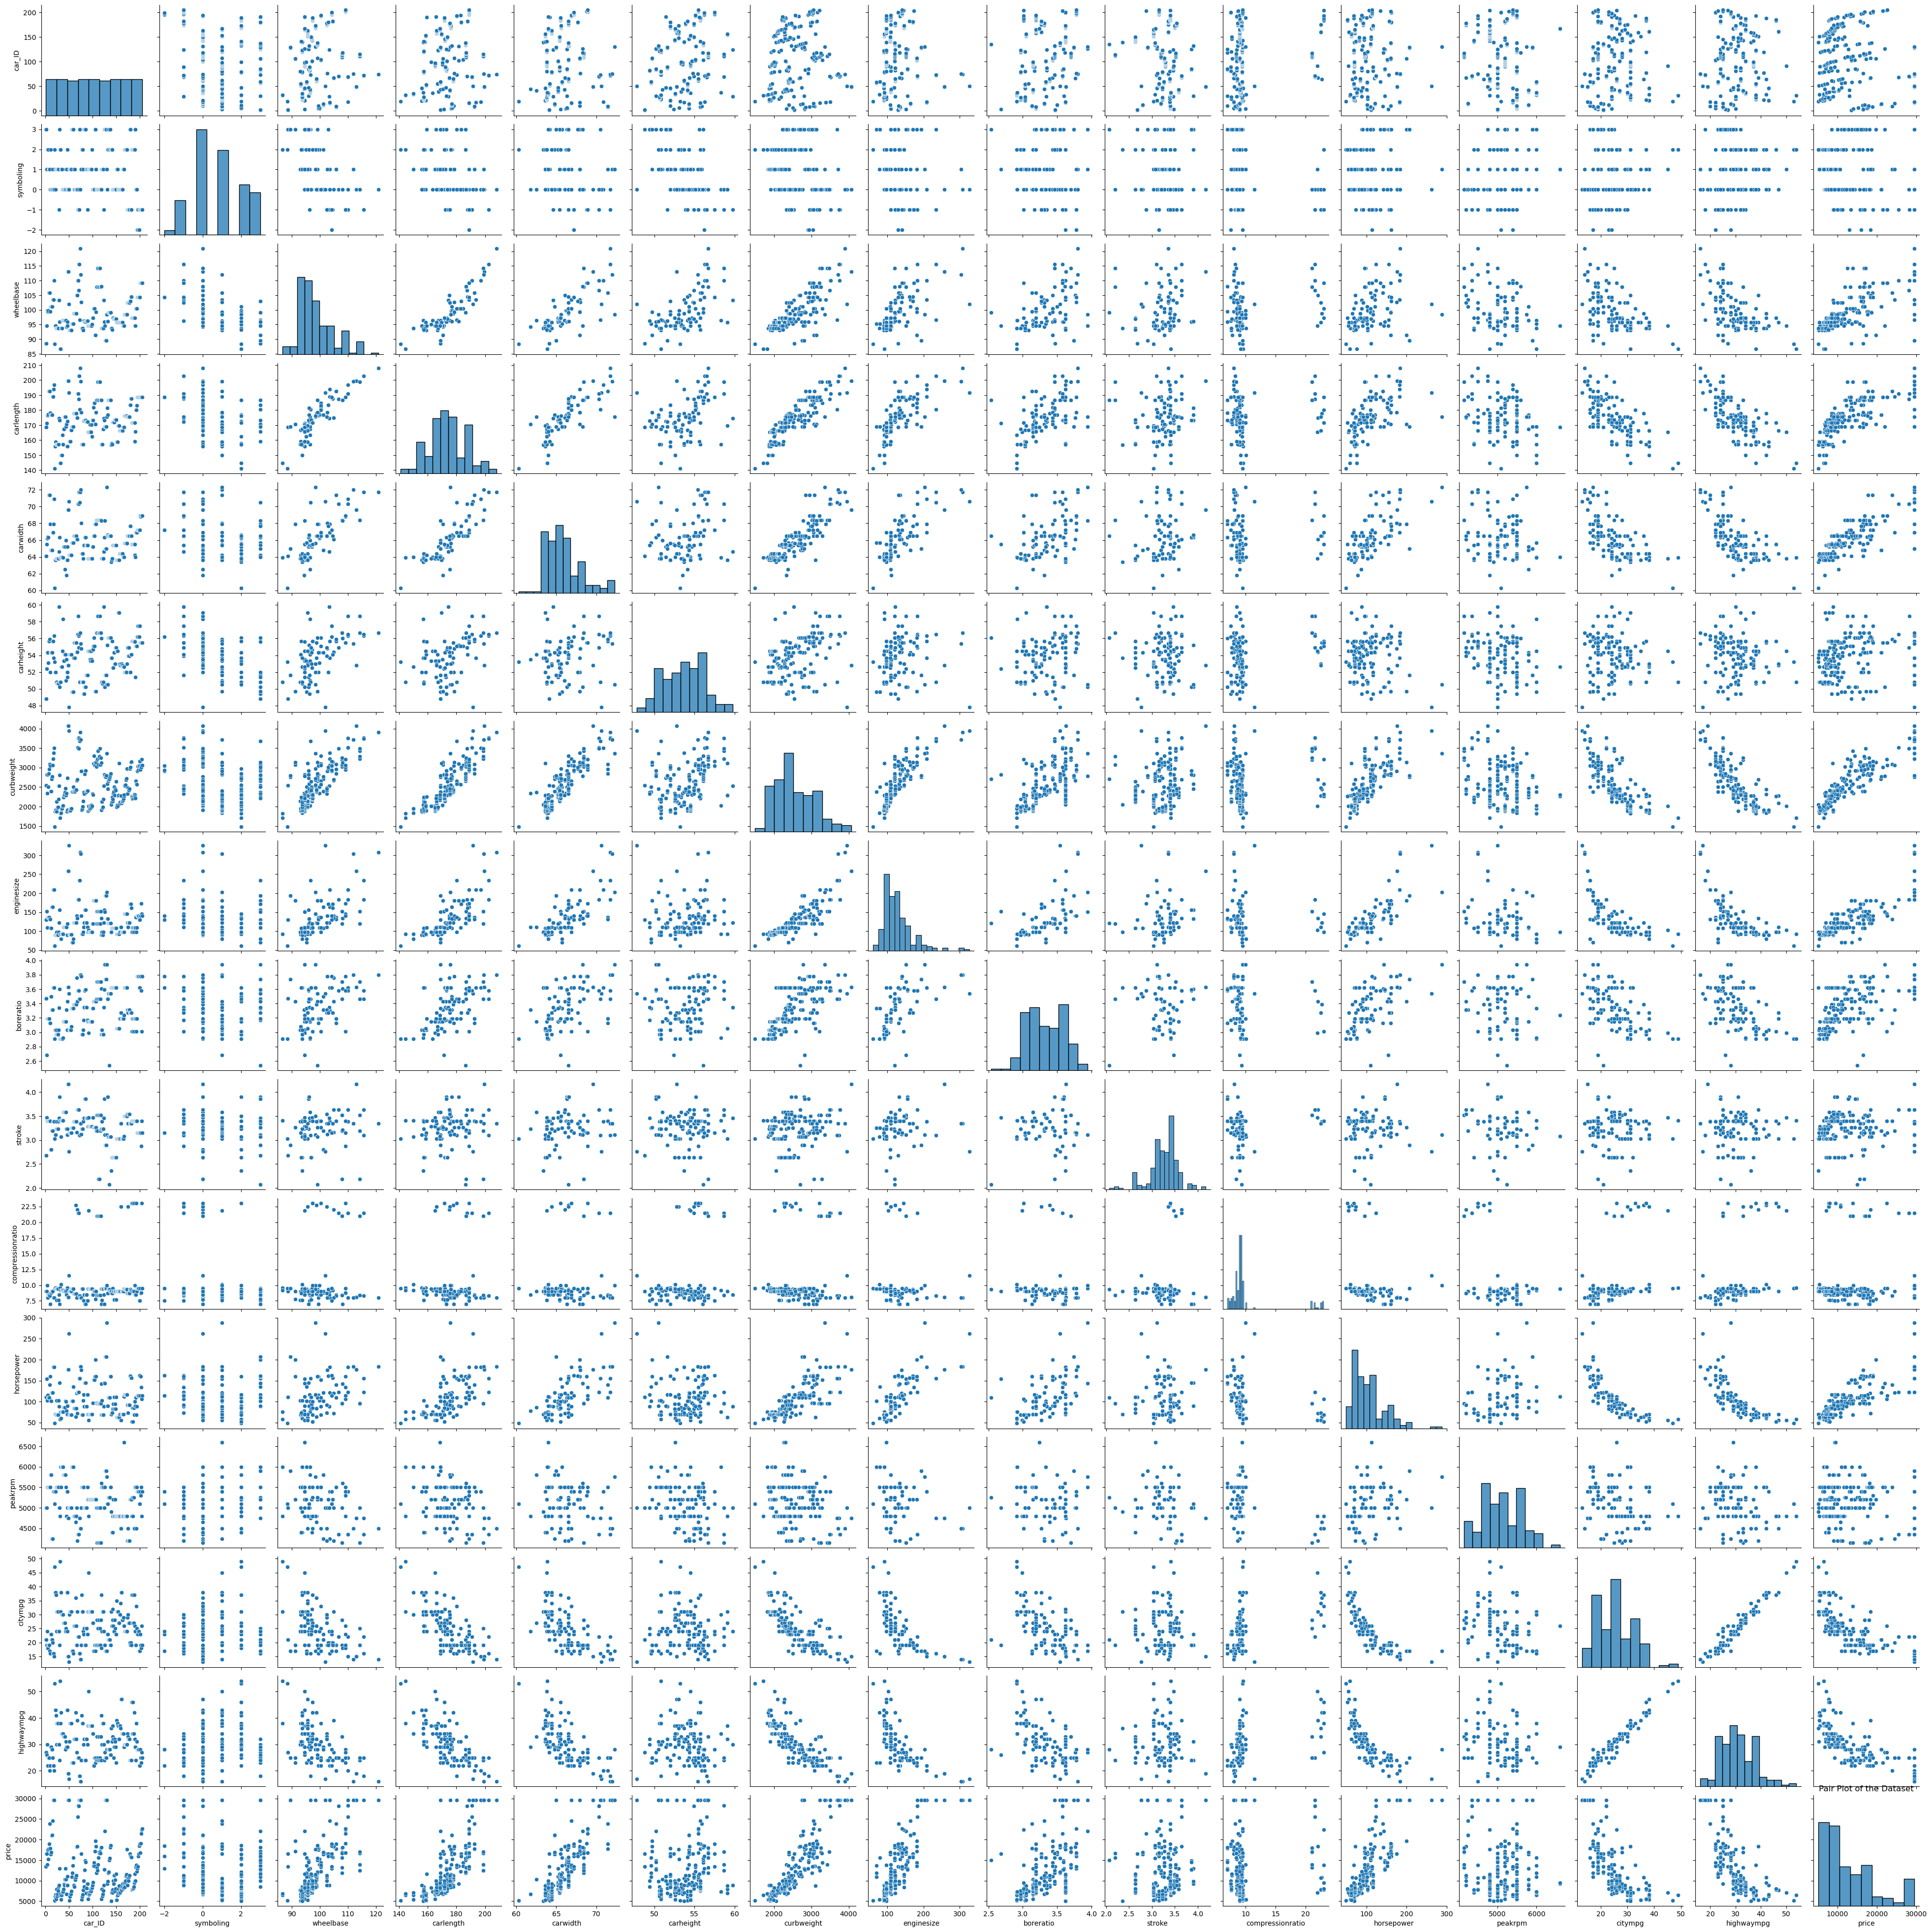

In [47]:
# Creating a Pair Plot with whole dataset

sns.pairplot(df)
plt.title("Pair Plot of the Dataset")
plt.show()

# Performing Linear Regression

In [48]:
df 


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [49]:
# columns name.

df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [52]:
# droping the columns which has (str) values.

x = df.drop(['price','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginelocation'
           ,'cylindernumber','fuelsystem','enginetype'],axis = 1)

In [53]:
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [54]:
y = df.price

In [55]:
y 

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [56]:
# Split Data Set accordingly by using train test split method from SKlearn

from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                random_state=42)

In [58]:
x_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,178,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,4200,27,32
75,76,1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24
174,175,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73,4500,30,33
31,32,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38
12,13,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25
14,15,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25
92,93,1,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,69,5200,31,37
179,180,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,5200,19,24


In [59]:
x_test

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
15,16,0,103.5,189.0,66.9,55.7,3230,209,3.62,3.390,8.00,182,5400,16,22
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22
100,101,0,97.2,173.4,65.2,54.7,2302,120,3.33,3.470,8.50,97,5200,27,34
132,133,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.070,9.31,110,5250,21,28
68,69,-1,110.0,190.9,70.3,58.7,3750,183,3.58,3.640,21.50,123,4350,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.40,101,6000,17,23
128,129,3,89.5,168.9,65.0,51.6,2800,194,3.74,2.900,9.50,207,5900,17,25
76,77,2,93.7,157.3,64.4,50.8,1918,92,2.97,3.230,9.40,68,5500,37,41
144,145,0,97.0,172.0,65.4,54.3,2385,108,3.62,2.640,9.00,82,4800,24,25


In [60]:
y_train

177    11248.0
75     16503.0
174    10698.0
31      6855.0
12     20970.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 143, dtype: float64

In [61]:
y_test

15     29575.500
9      17859.167
100     9549.000
132    11850.000
68     28248.000
         ...    
56     11845.000
128    29575.500
76      5389.000
144     9233.000
104    17199.000
Name: price, Length: 62, dtype: float64

In [62]:
# Importing LinearRegression.

from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [64]:
lr

LinearRegression()

In [65]:
# Model Fittment 

lr.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(x_test)

In [67]:
y_pred

array([ 2.40843363e+04,  1.89895846e+04,  1.00144790e+04,  1.46889373e+04,
        2.41382507e+04,  6.35758607e+03,  8.75384277e+03,  6.58255228e+03,
        1.15123856e+04,  9.35610370e+03,  1.35413180e+04,  6.28394120e+03,
        1.62074971e+04,  8.34047858e+03,  3.17923746e+04,  5.64785008e+03,
       -2.82227816e+01,  1.53911999e+04,  1.02911845e+04,  1.10532576e+04,
        1.07696229e+04,  1.98730535e+04,  6.62179123e+03,  1.77425213e+03,
        7.24410376e+03,  2.46715917e+04,  1.22918448e+04,  1.55909283e+04,
        6.24767296e+03,  1.48676303e+04,  2.31885705e+04,  6.08090978e+03,
        6.63662925e+03,  1.99143715e+04,  8.79970411e+03,  2.30036426e+04,
        1.16709128e+04,  1.21309884e+04,  5.58348587e+03,  1.56676771e+04,
        9.21455485e+03,  1.40224693e+04,  1.80070131e+04,  6.19812141e+03,
        6.28853018e+03,  1.01618238e+04,  7.18544141e+03,  8.19043410e+03,
        1.80591401e+04,  1.58421600e+04,  5.99161498e+03,  1.87884957e+04,
        6.46831863e+03,  

In [68]:
# Importing Metrics.

from sklearn.metrics import r2_score

In [69]:
r2_score(y_test,y_pred)

0.8582867981902274

In [70]:
# Creating new dataFrame to show the difference between the actual vs predicted values.

new_df = pd.DataFrame({'Prediction of Y':y_pred,
                       'Difference':y_pred-y_test})

In [71]:
new_df

,Prediction of Y,Difference
15,24084.336346,-5491.163654
9,18989.584569,1130.417569
100,10014.478978,465.478978
132,14688.937294,2838.937294
68,24138.250674,-4109.749326
...,...,...
56,12119.482878,274.482878
128,23045.825086,-6529.674914
76,5582.133469,193.133469
144,9761.893834,528.893834


# END